<a href="https://colab.research.google.com/github/dbeniteze/clasificacion_CIFAR10/blob/master/aug_4cap_leaky_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install keras==2.3.1
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

     |████████████████████████████████| 378kB 11.0MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
# Larger CNN for the MNIST Dataset
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Reshape
from keras.layers import Flatten, BatchNormalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3)).astype('float32')
# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

X_train_mean = np.mean(X_train, axis=(0,1,2))
X_train_std = np.std(X_train, axis=(0,1,2))
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


epoch = 150

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate


# define model
model = Sequential()
LF=(5,5) # longitud del filtro
model.add( Reshape((32,32,3), input_shape=(32,32,3)) )
model.add( Conv2D(32, LF, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Conv2D(32, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.05))
model.add( Conv2D(64, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.05))
model.add( Conv2D(128, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D())  
model.add(Dropout(0.05))
model.add(Flatten())
model.add(BatchNormalization())
model.add( Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(32, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(10,activation='softmax') )
  
  
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr_schedule(epoch)), metrics=['accuracy'])
 
model.summary()

In [0]:

# Fit the model
modelo = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=125)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)


plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/150
782/782 [==============================] - 44s 57ms/step - loss: 1.5348 - accuracy: 0.4561 - val_loss: 1.2111 - val_accuracy: 0.5702
Epoch 2/150
782/782 [==============================] - 36s 46ms/step - loss: 1.1568 - accuracy: 0.5905 - val_loss: 0.9808 - val_accuracy: 0.6578
Epoch 3/150
782/782 [==============================] - 36s 46ms/step - loss: 1.0051 - accuracy: 0.6485 - val_loss: 0.8965 - val_accuracy: 0.6950
Epoch 4/150
782/782 [==============================] - 37s 48ms/step - loss: 0.9099 - accuracy: 0.6836 - val_loss: 0.8002 - val_accuracy: 0.7252
Epoch 5/150
782/782 [==============================] - 37s 48ms/step - loss: 0.8450 - accuracy: 0.7061 - val_loss: 0.7871 - val_accuracy: 0.7314
Epoch 6/150
782/782 [==============================] - 38s 48ms/step - loss: 0.7801 - accuracy: 0.7282 - val_loss: 0.7174 - val_accuracy: 0.7560
Epoch 7/150
782/782 [==============================] - 37s 48ms/step - loss: 0.7479 - accuracy: 0.7405 - val_loss: 0.6850 - val_ac

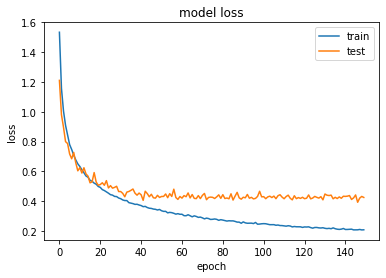

Error: 12.62%


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
        #brillo
        #brightness_range=[0.2,1.0],           #añadido
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=15,                          #modificado
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        #zoom_range=[0.5,1.0],                       #modificado
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
modelo = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                        validation_data=(X_test, y_test),
                        epochs=epoch, verbose=1)
    

scores = model.evaluate(X_test, y_test, verbose=0)


plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

print("Error: %.2f%%" % (100-scores[1]*100))